# **HEART** **DISEASE** **PREDICTION** **MODEL**

Name: Nihala Nusrin P.A


Organization: Entri Elevate

Date: 19-04-2025

##**1.** **Overview** **of** **the** **Problem** **Statement**:

Heart disease refers to various conditions affecting the heart, including coronary artery disease, arrhythmias, and heart failure. It is a leading cause of death worldwide, making early detection and prevention crucial.A heart disease prediction model helps assess an individual's risk of developing cardiovascular conditions based on medical and lifestyle factors. By using machine learning or statistical models, healthcare professionals can make data-driven decisions for early intervention and treatment.

##**2.** **Objective**:

To predict the risk of cardiovascular disease (CVD) based on various health parameters. By leveraging this dataset, we can develop models to assess heart disease risk and identify key contributing factors.


##**3**. **Data** **Description**:

### **Source**: Data World

### **Features in the dataset**:

The dataset contains **70,000** rows with **13** columns related to cardiovascular health indicators.Here all columns are numerical.

**1. id** – Unique identifier for each record

**2. age** – Age in days

**3. gender** – Gender (1 = Female, 2 = Male)

**4. height** – Height in cm

**5. weight** – Weight in kg

**6. ap_hi** – Systolic blood pressure

**7. ap_lo** – Diastolic blood pressure

**8. cholesterol** – Cholesterol level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)

**9. gluc** – Glucose level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)

**10. smoke** – Smoking status (0 = No, 1 = Yes)

**11. alco** – Alcohol intake (0 = No, 1 = Yes)

**12. active** – Physical activity (0 = No, 1 = Yes)

**13. cardio** – Presence of cardiovascular disease (0 = No, 1 = Yes)

### **Target Variable**: Cardio

## **4. Data Collection**

###**Dataset link**:https://data.world/kudem/heart-disease-dataset/workspace/file?filename=heart_data.csv

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving heart_data.csv to heart_data.csv


### **Import necessary libraries**

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

### **Loading dataset**

In [3]:
data = pd.read_csv('heart_data.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
#displaying first 5 rows
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#displaying last 5 rows
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


## **5. Data Preprocessing- Data Cleaning**

In [6]:
#We have to convert age column from days to years
data["age"] = (data["age"] / 365).astype(int)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#no of rows and columns
data.shape

(70000, 13)

In [7]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


####**Mean>50% - which means positively skewed**
####**Mean<50% - which means negatively skewed**

**Outliers** are present in the numerical columns such as **age, height, weight, ap_hi** (systolic blood pressure), and **ap_lo** (diastolic blood pressure). Additionally, the data exhibits skewness, which indicates that the distribution of values is not symmetric. Several columns are **negatively skewed**, including **id, age, height, and active**, where the majority of values are concentrated on the higher end of the distribution. Conversely, features such as **gender, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, and alco** show **positive skewness**, meaning most values are clustered toward the lower end with a long tail to the right.

###**id column is not necessary for model building, so we have to drop it**

In [8]:
data.drop(['id'],axis=1,inplace= True)
print('Remaining columns are : ',data.columns)

Remaining columns are :  Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
#displaying dataset again
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


### **Checking missing values**

In [9]:
print("Missing values in each column:\n")
data.isnull().sum()

Missing values in each column:



,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


####**There is no null values in the dataset.**

###**Checking duplicates**

In [ ]:
data.duplicated().sum()

np.int64(0)

###**There is no duplicates.**

###**Checking Outliers**

In [10]:
num_data= data.select_dtypes('number')
num_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
num_cols = list(num_data)
num_cols

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [12]:
#checking skewness
num_data.skew()

,0
age,-0.305744
gender,0.630960
height,-0.642187
weight,1.012070
ap_hi,85.296214
ap_lo,32.114083
cholesterol,1.587123
gluc,2.397462
smoke,2.905867
alco,3.956607


###**Symmetrical Distribution: Skewness is around 0.**

###**Moderately Skewed: Skewness between -0.5 and 0.5.**

###**Highly Skewed: Skewness less than -1 or greater than 1.**


The features **ap_hi, ap_lo, gluc, smoke, and alco** exhibit a high degree of positive skewness, indicating that the majority of their values are concentrated toward the lower end, with a long tail extending to the right. This skewness suggests that there are extreme values or outliers present in these columns.

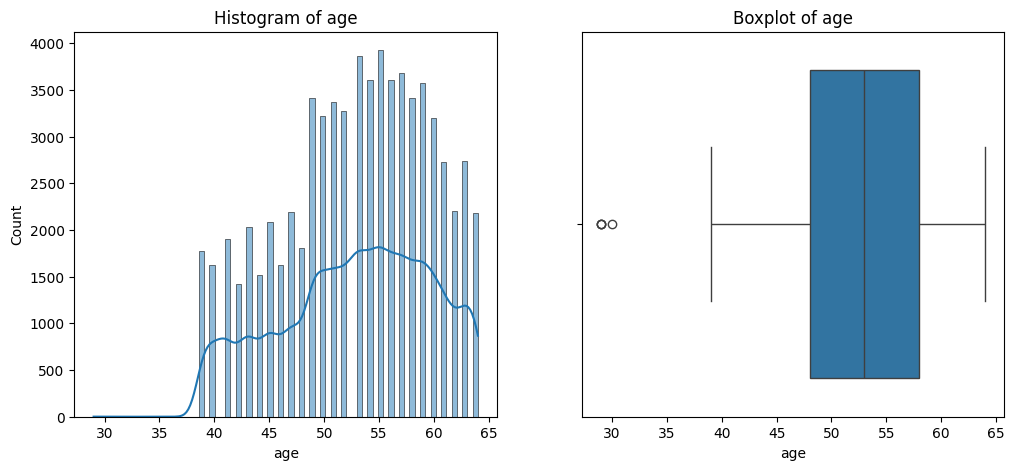

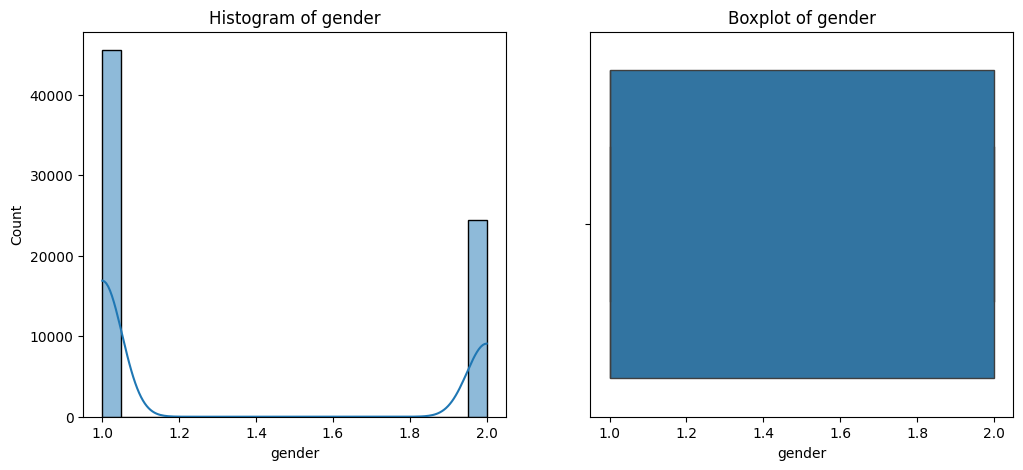

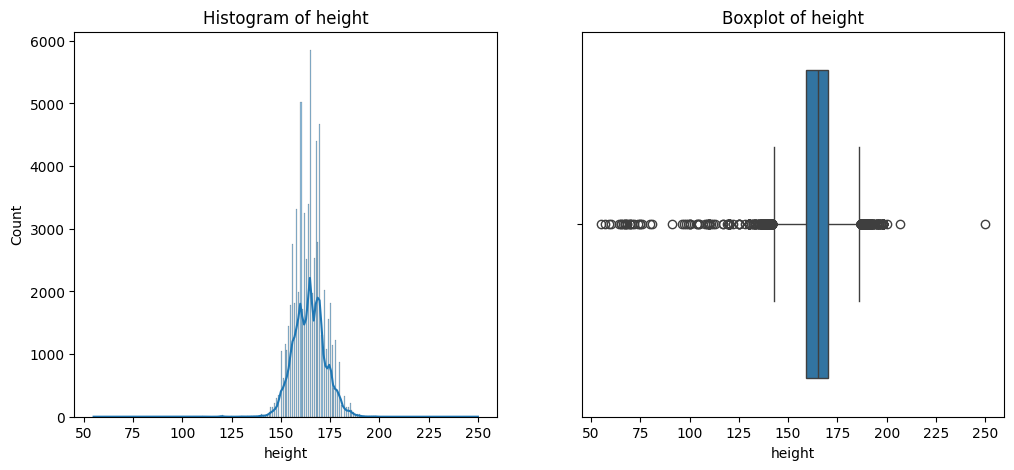

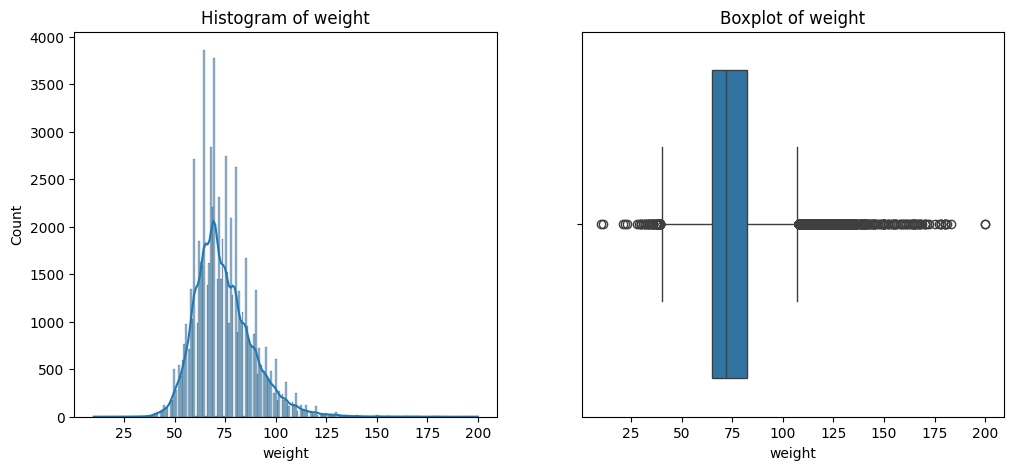

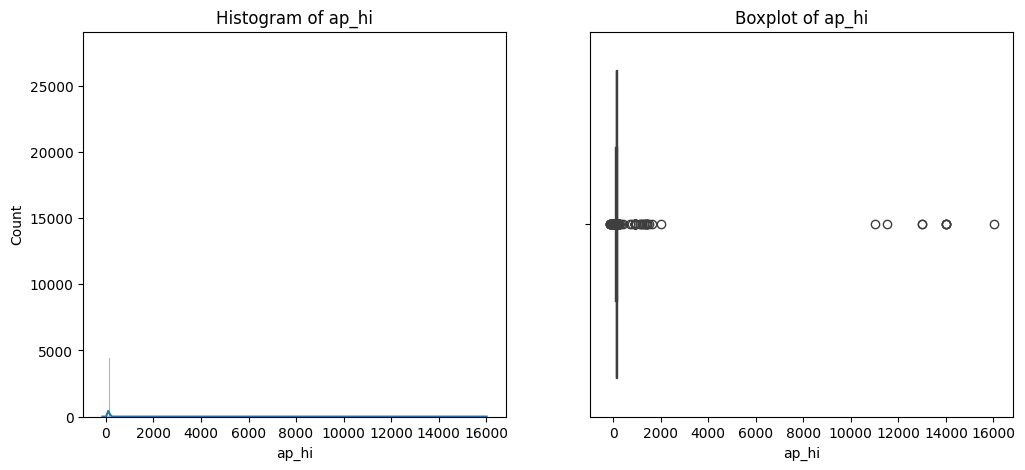

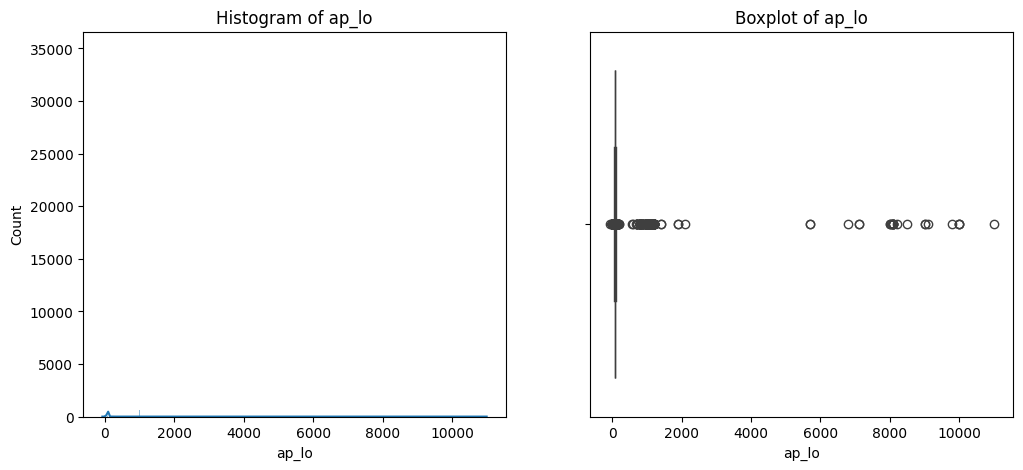

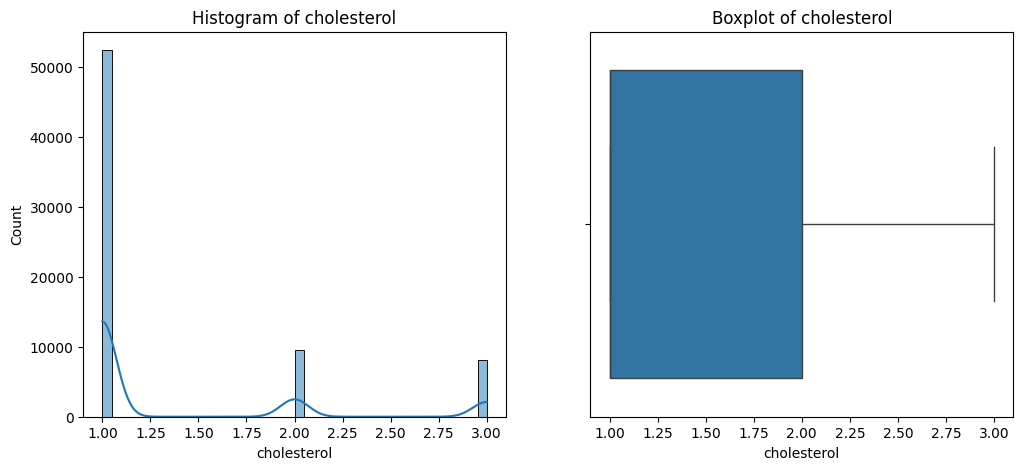

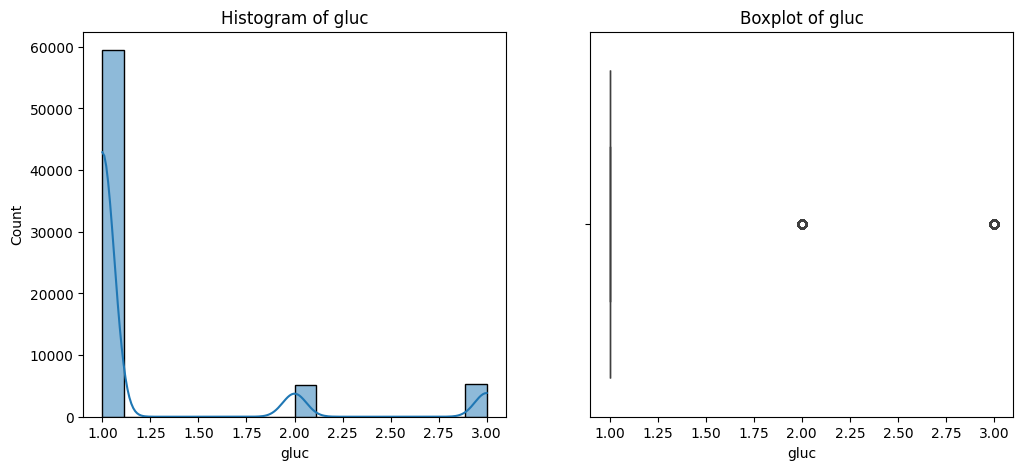

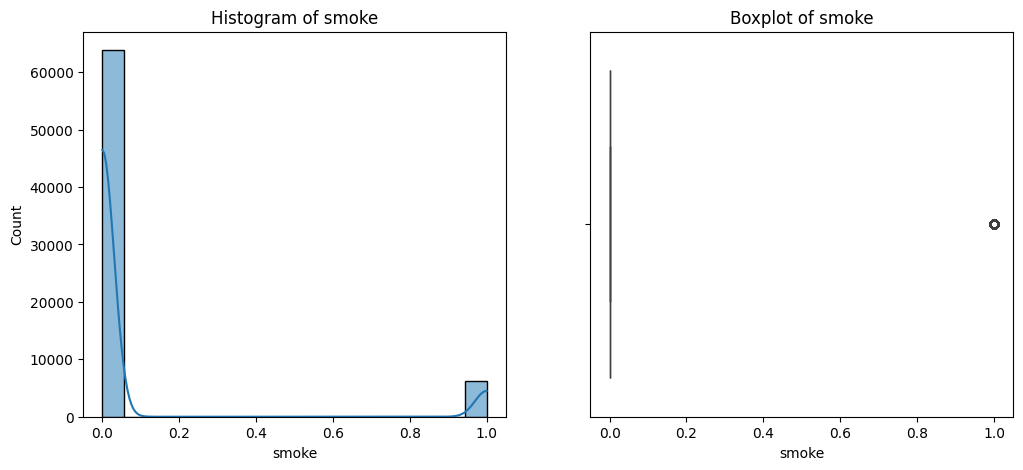

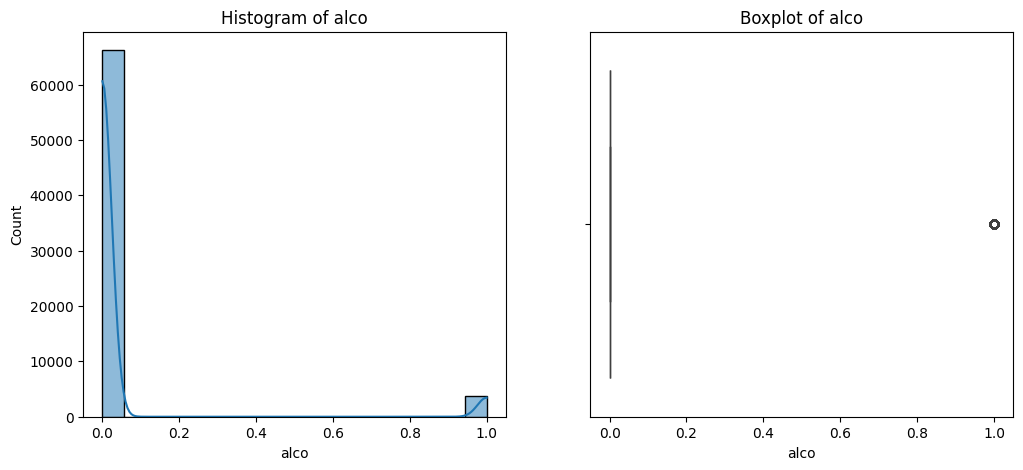

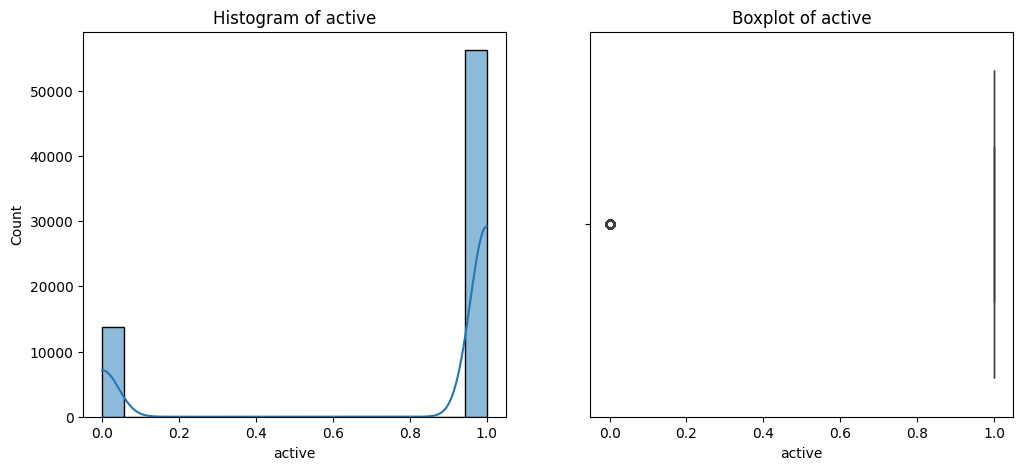

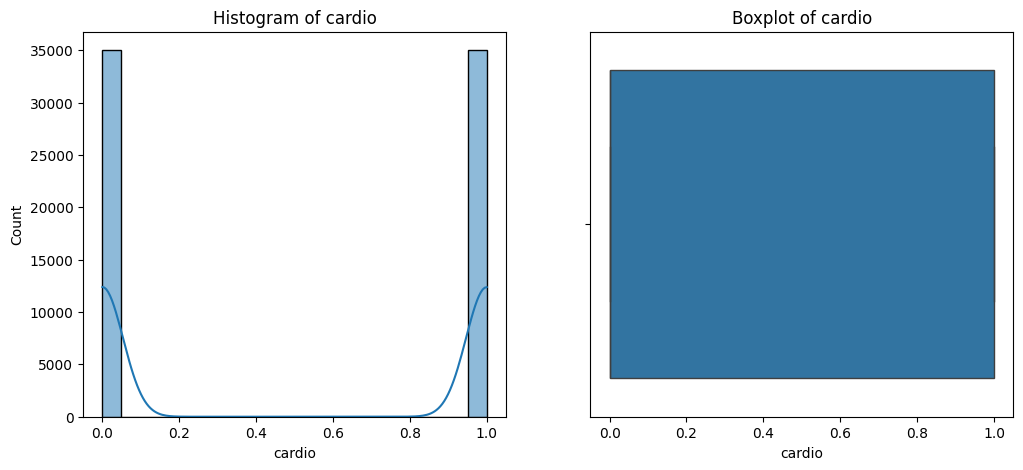

In [ ]:
for column in num_cols:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[column],kde=True)
    plt.title(f'Histogram of {column}')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

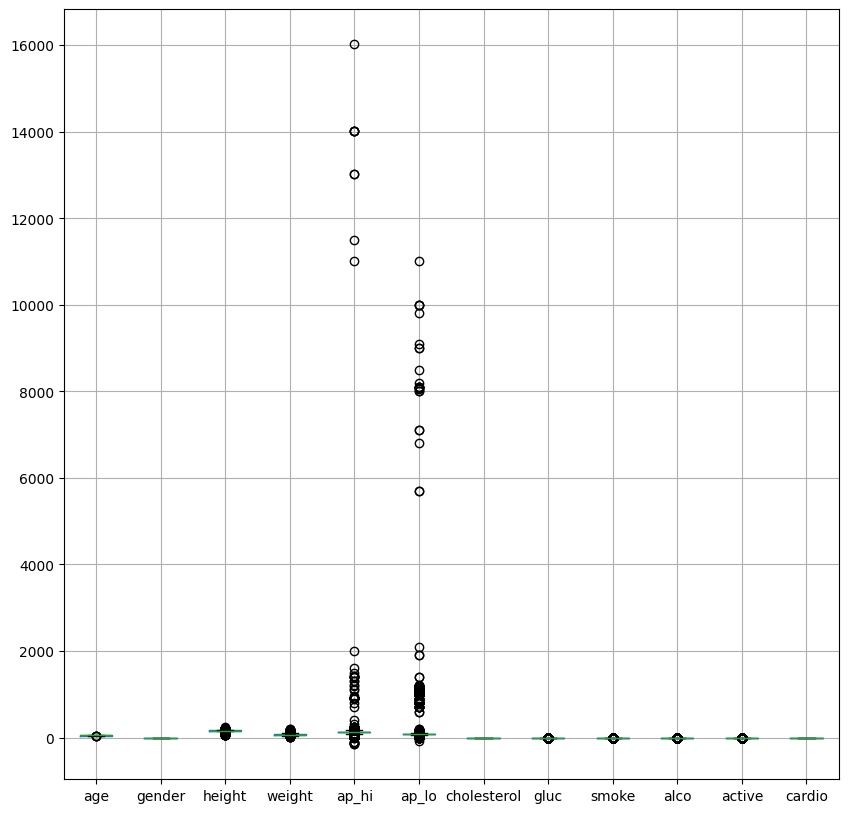

In [13]:
#plot boxplot
data.boxplot(figsize=(10,10))
plt.show()

By examining the boxplot, we can clearly observe the presence of outliers in several numerical features. Outliers can negatively impact the performance of machine learning models by skewing distributions and influencing model parameters. To handle this issue, we apply the **Capping method.**

###**Capping** is used to handle outliers by limiting extreme values within a specified range. Instead of removing outliers, it replaces values beyond a threshold (like the 5th and 95th percentiles) with the nearest acceptable values.

In [14]:
 def cap_outliers(data, columns, lower_q=0.05, upper_q=0.95):
    df_capped = data.copy()
    for col in columns:
        lower = df_capped[col].quantile(lower_q)
        upper = df_capped[col].quantile(upper_q)
        df_capped[col] = np.clip(df_capped[col], lower, upper)
    return df_capped

df_capped = cap_outliers(data, num_cols)
print(f"Capped outliers using 5th–95th percentiles.")

Capped outliers using 5th–95th percentiles.


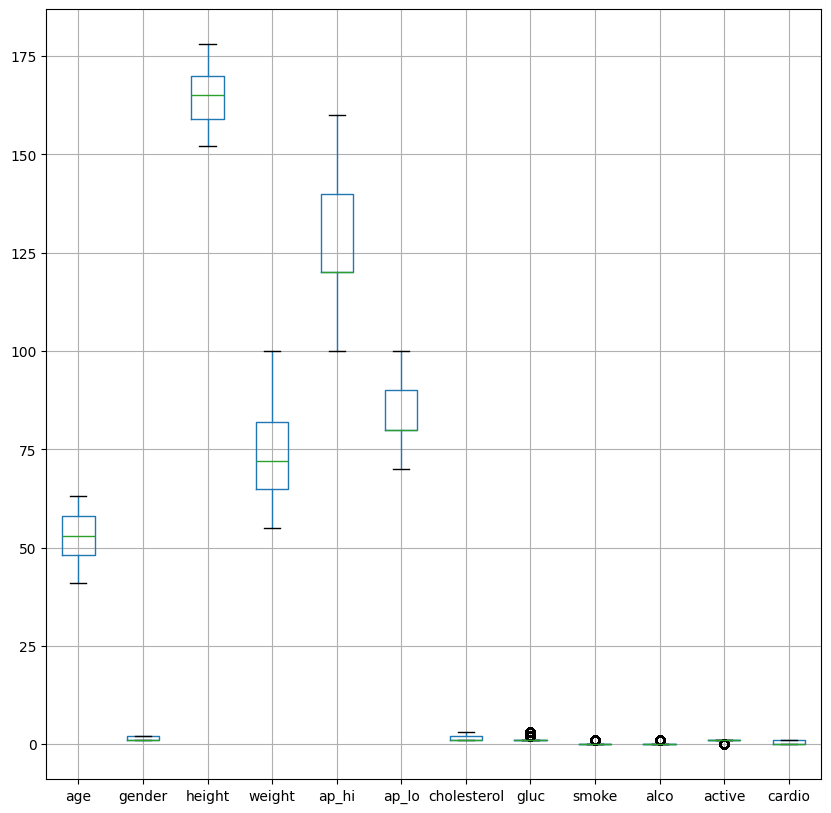

In [15]:
#boxplot after capping
df_capped.boxplot(figsize=(10,10))
plt.show()

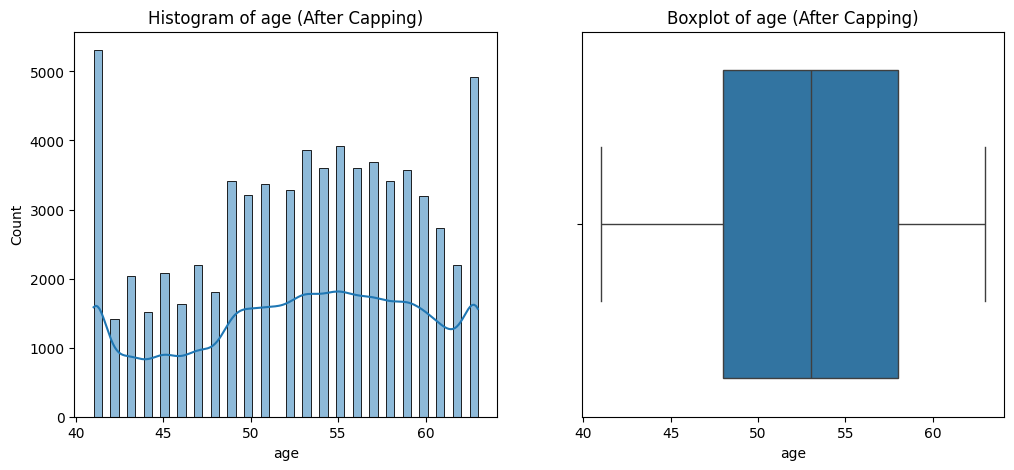

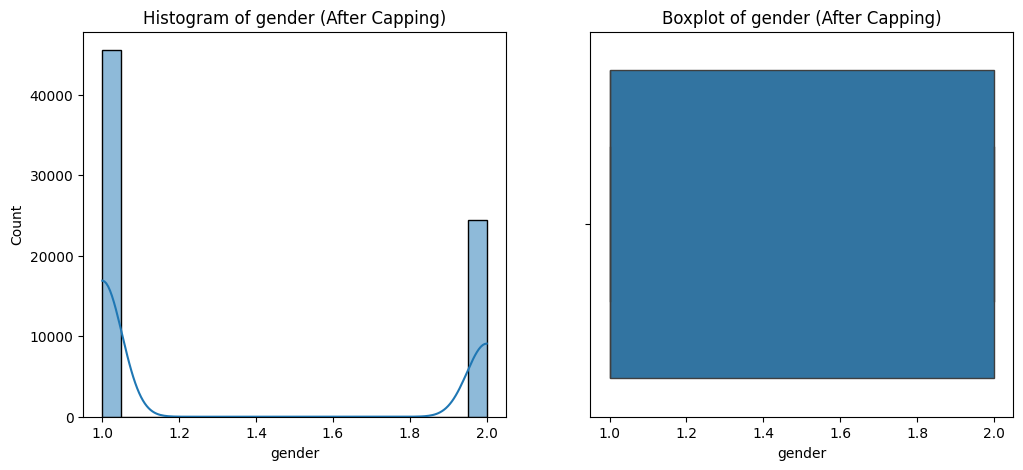

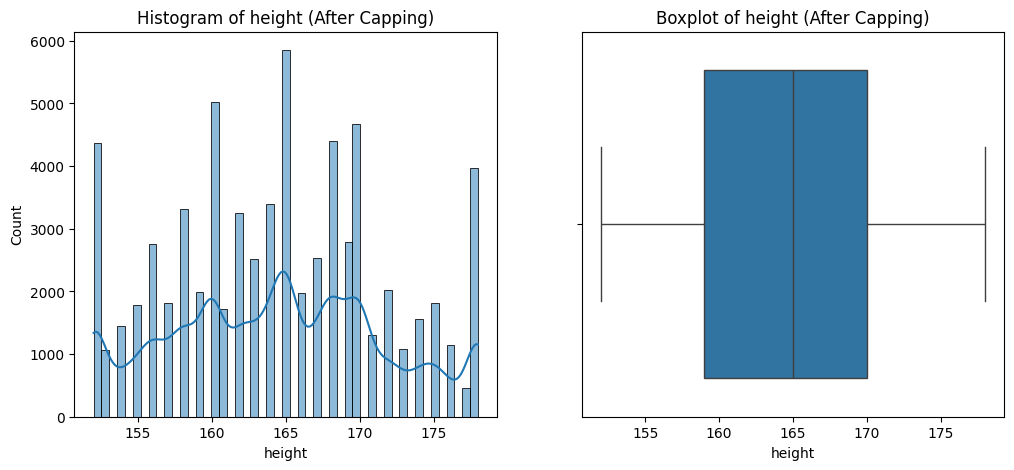

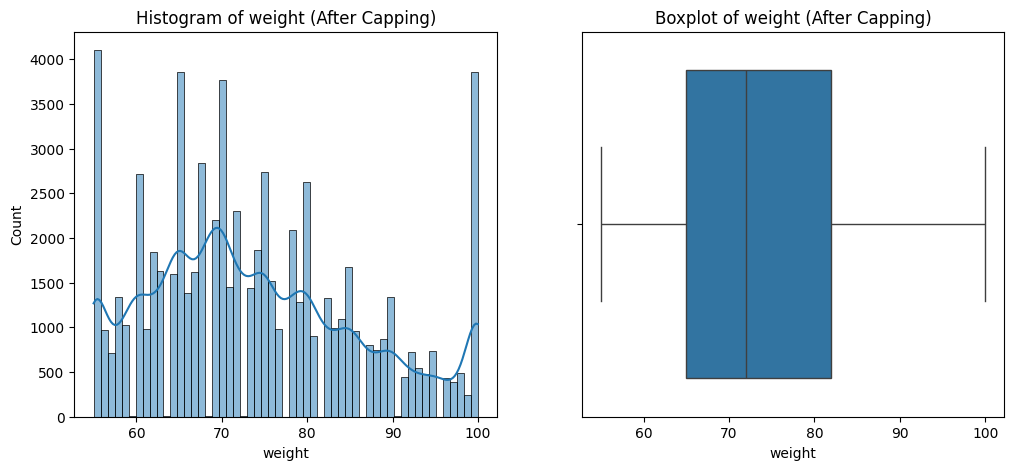

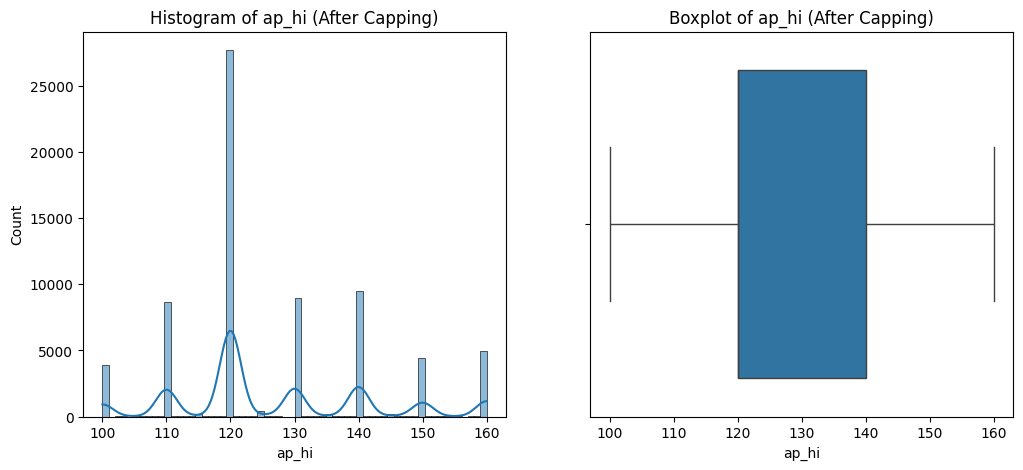

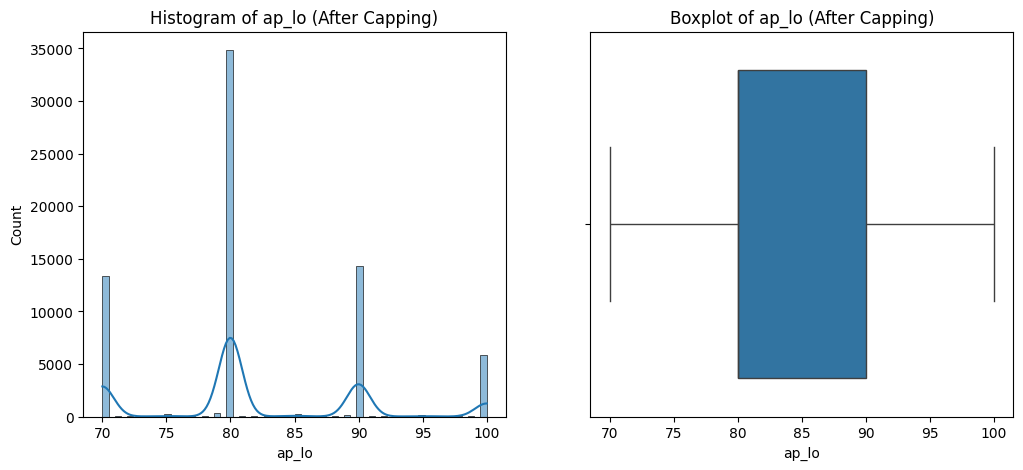

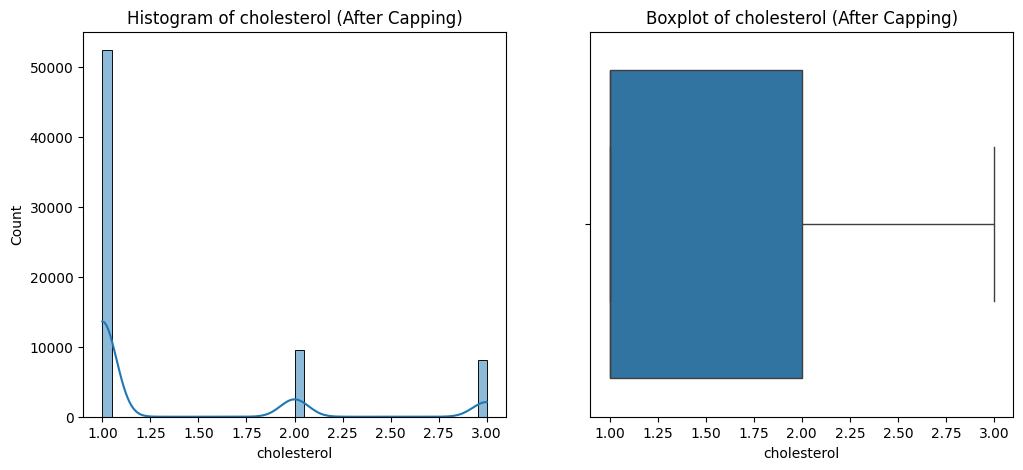

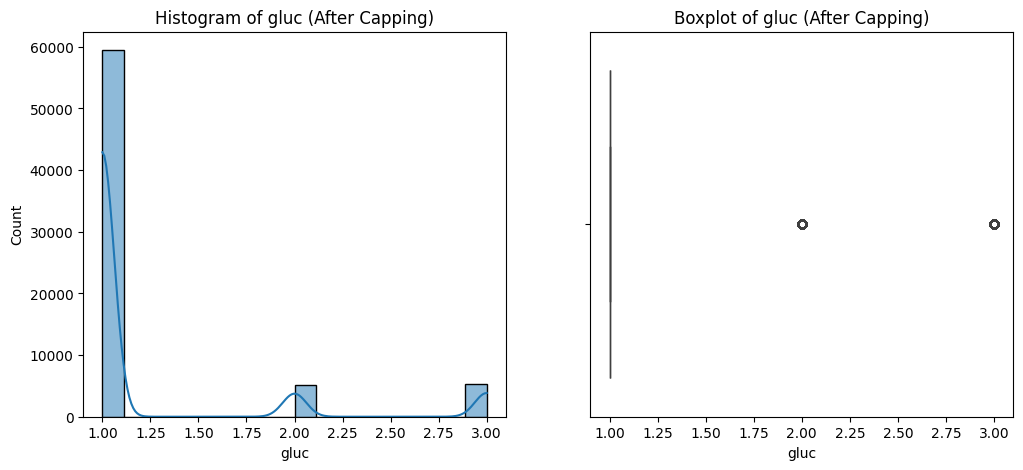

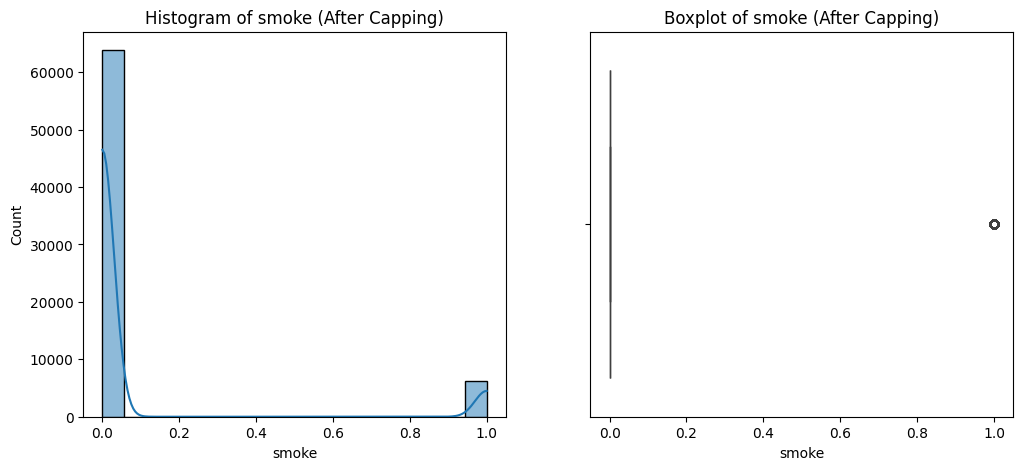

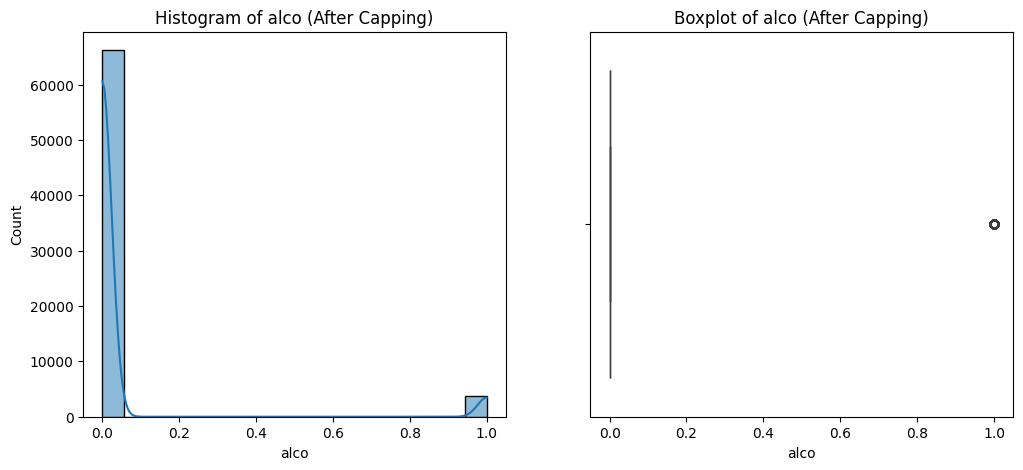

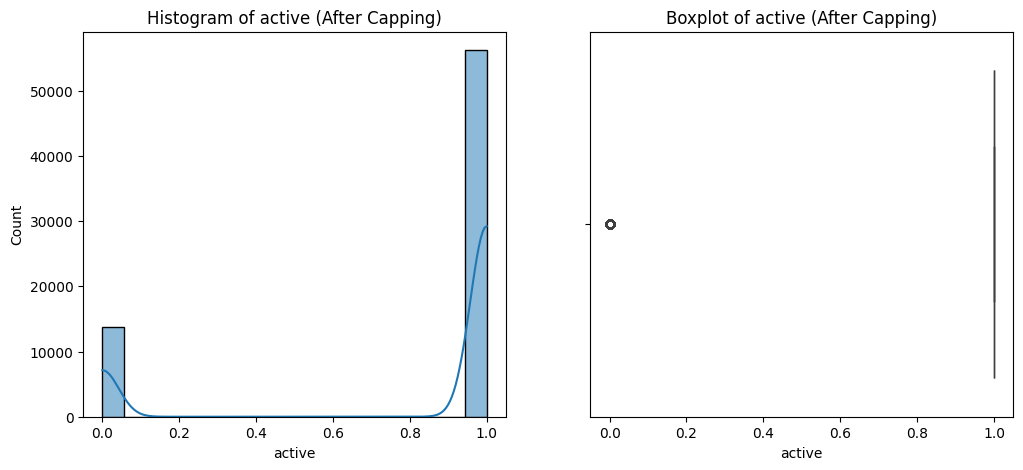

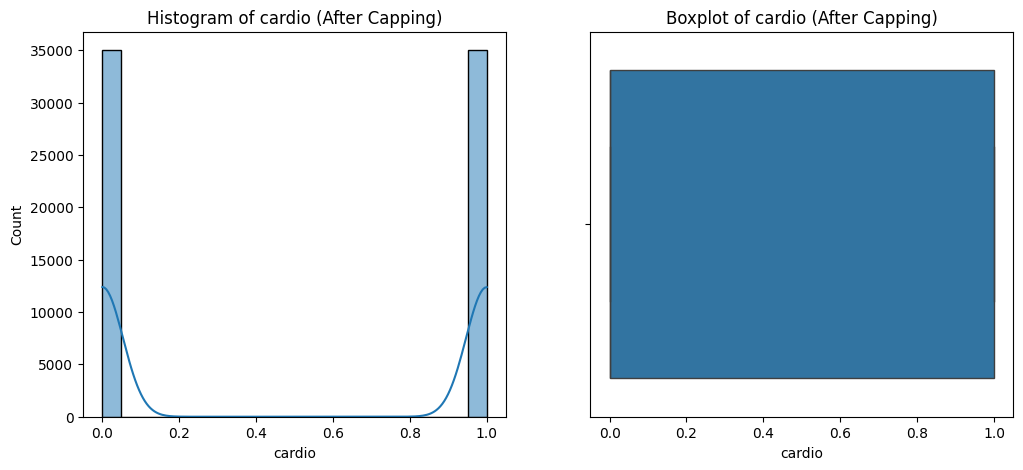

In [ ]:
# Visualize the data after capping
for column in df_capped:
    plt.figure(figsize=(12, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_capped[column], kde=True)
    plt.title(f'Histogram of {column} (After Capping)')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_capped[column])
    plt.title(f'Boxplot of {column} (After Capping)')
    plt.show()

In [16]:
#checking skewness after capping
df_capped.skew()

,0
age,-0.262445
gender,0.630960
height,0.085375
weight,0.476133
ap_hi,0.575170
ap_lo,0.487254
cholesterol,1.587123
gluc,2.397462
smoke,2.905867
alco,3.956607


Skewness has been significantly reduced compared to its previous state.

In [17]:
#checking shape
df_capped.shape

(70000, 12)

###**Data preprocessing is over**

##**6. Exploratory Data Analysis (EDA)**

###**Correlation heatmap**

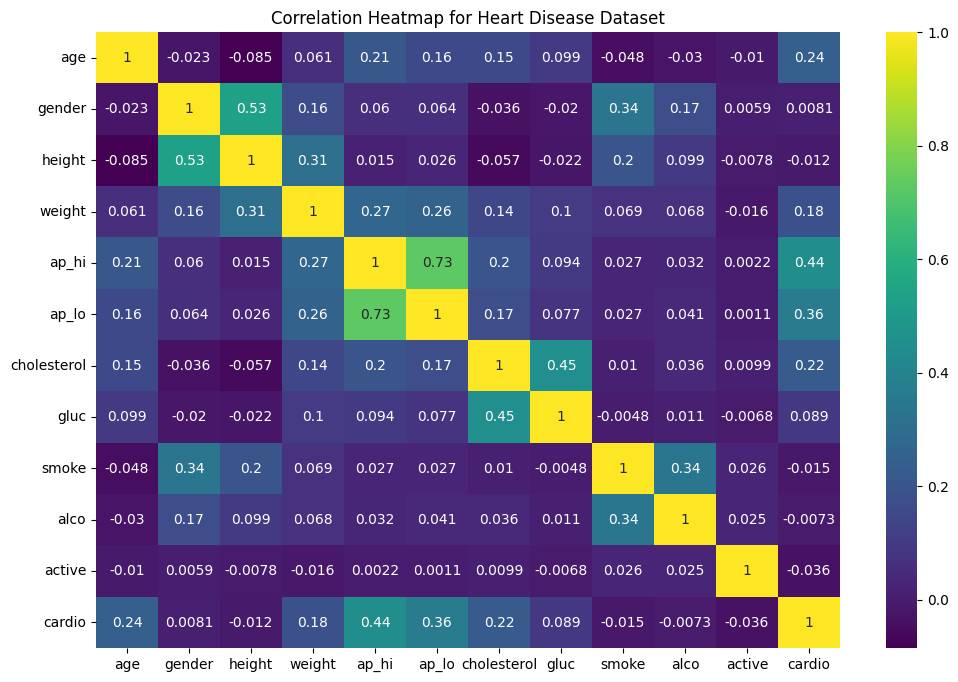

In [ ]:
# Compute the correlation matrix
corr_matrix = df_capped.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Heart Disease Dataset')
plt.show()


**Results**:

* **age**: Positively correlated with cardio, meaning older individuals are more likely to have cardiovascular disease.

* **ap_hi** & **ap_lo**: Strongly correlated with cardio, indicating that high blood pressure increases heart disease risk.

* **cholesterol** & **gluc**: Both show a moderate to strong positive correlation with cardio, suggesting that high cholesterol and glucose levels contribute to heart disease.

* **active**: Likely shows a weak or negative correlation, meaning active individuals tend to have a lower risk.

* **smoke & Alco**: Have Weak Correlation with Cardiovascular Disease.smoking and alcohol consumption do not show a strong correlation with cardiovascular disease in this dataset.

* **Weight**:Individuals with higher weight seem to have a greater risk of cardiovascular disease.

* **Height**: correlation between height and cardio is weak or close to zero in the heatmap.This means that height does not have a significant direct impact on the likelihood of cardiovascular disease.

* **gender**:correlation between gender and cardio is very weak or close to zero in the heatmap.


In [ ]:
#print all columns
cols=df_capped.columns
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

###**Boxplot**

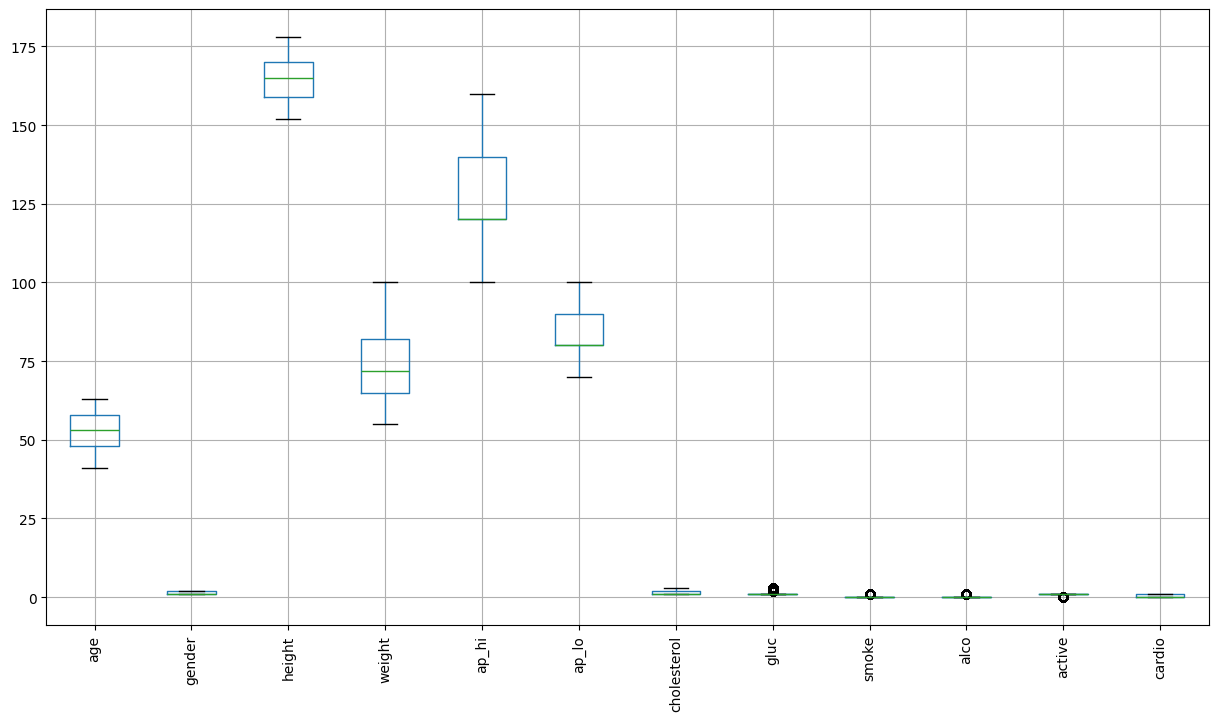

In [ ]:
plt.figure(figsize = (15,8))
df_capped.boxplot()
plt.xticks(rotation = 90)
plt.show()

###**Histogram**

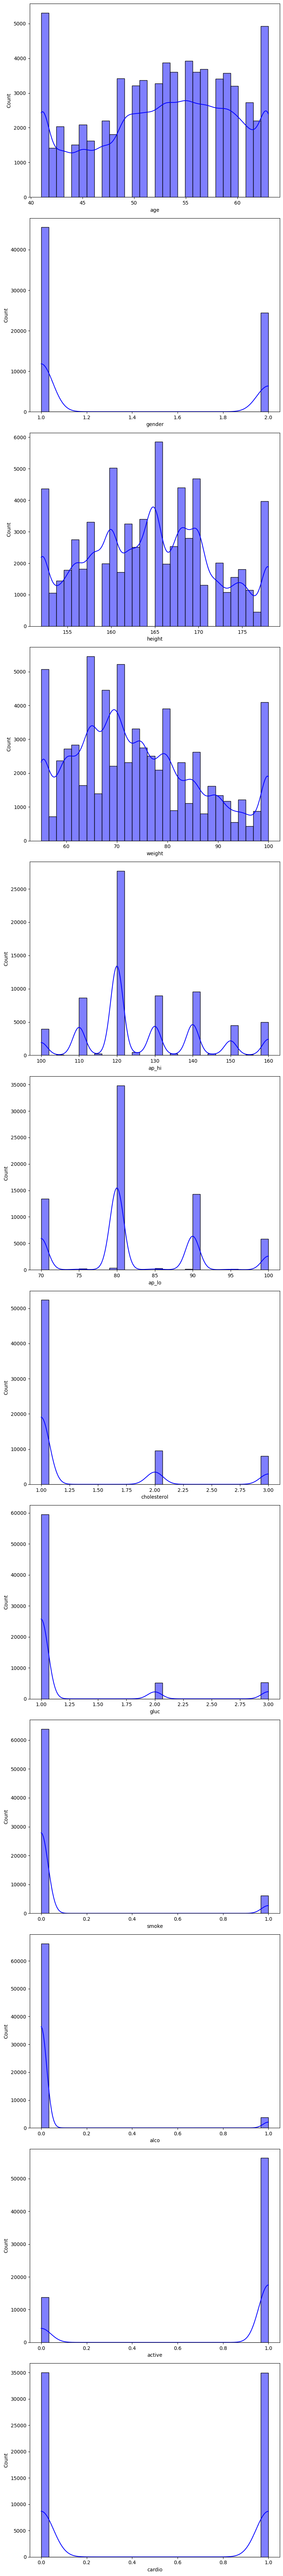

In [ ]:
# Create histograms for all columns
fig, axs = plt.subplots(nrows=len(df_capped.columns), ncols=1, figsize=(8, 6 * len(df_capped.columns)))

for i, col in enumerate(df_capped.columns):
    sns.histplot(df_capped[col], bins=30, kde=True, ax=axs[i], color='blue')

plt.tight_layout()
plt.show()

###**Pairplot**

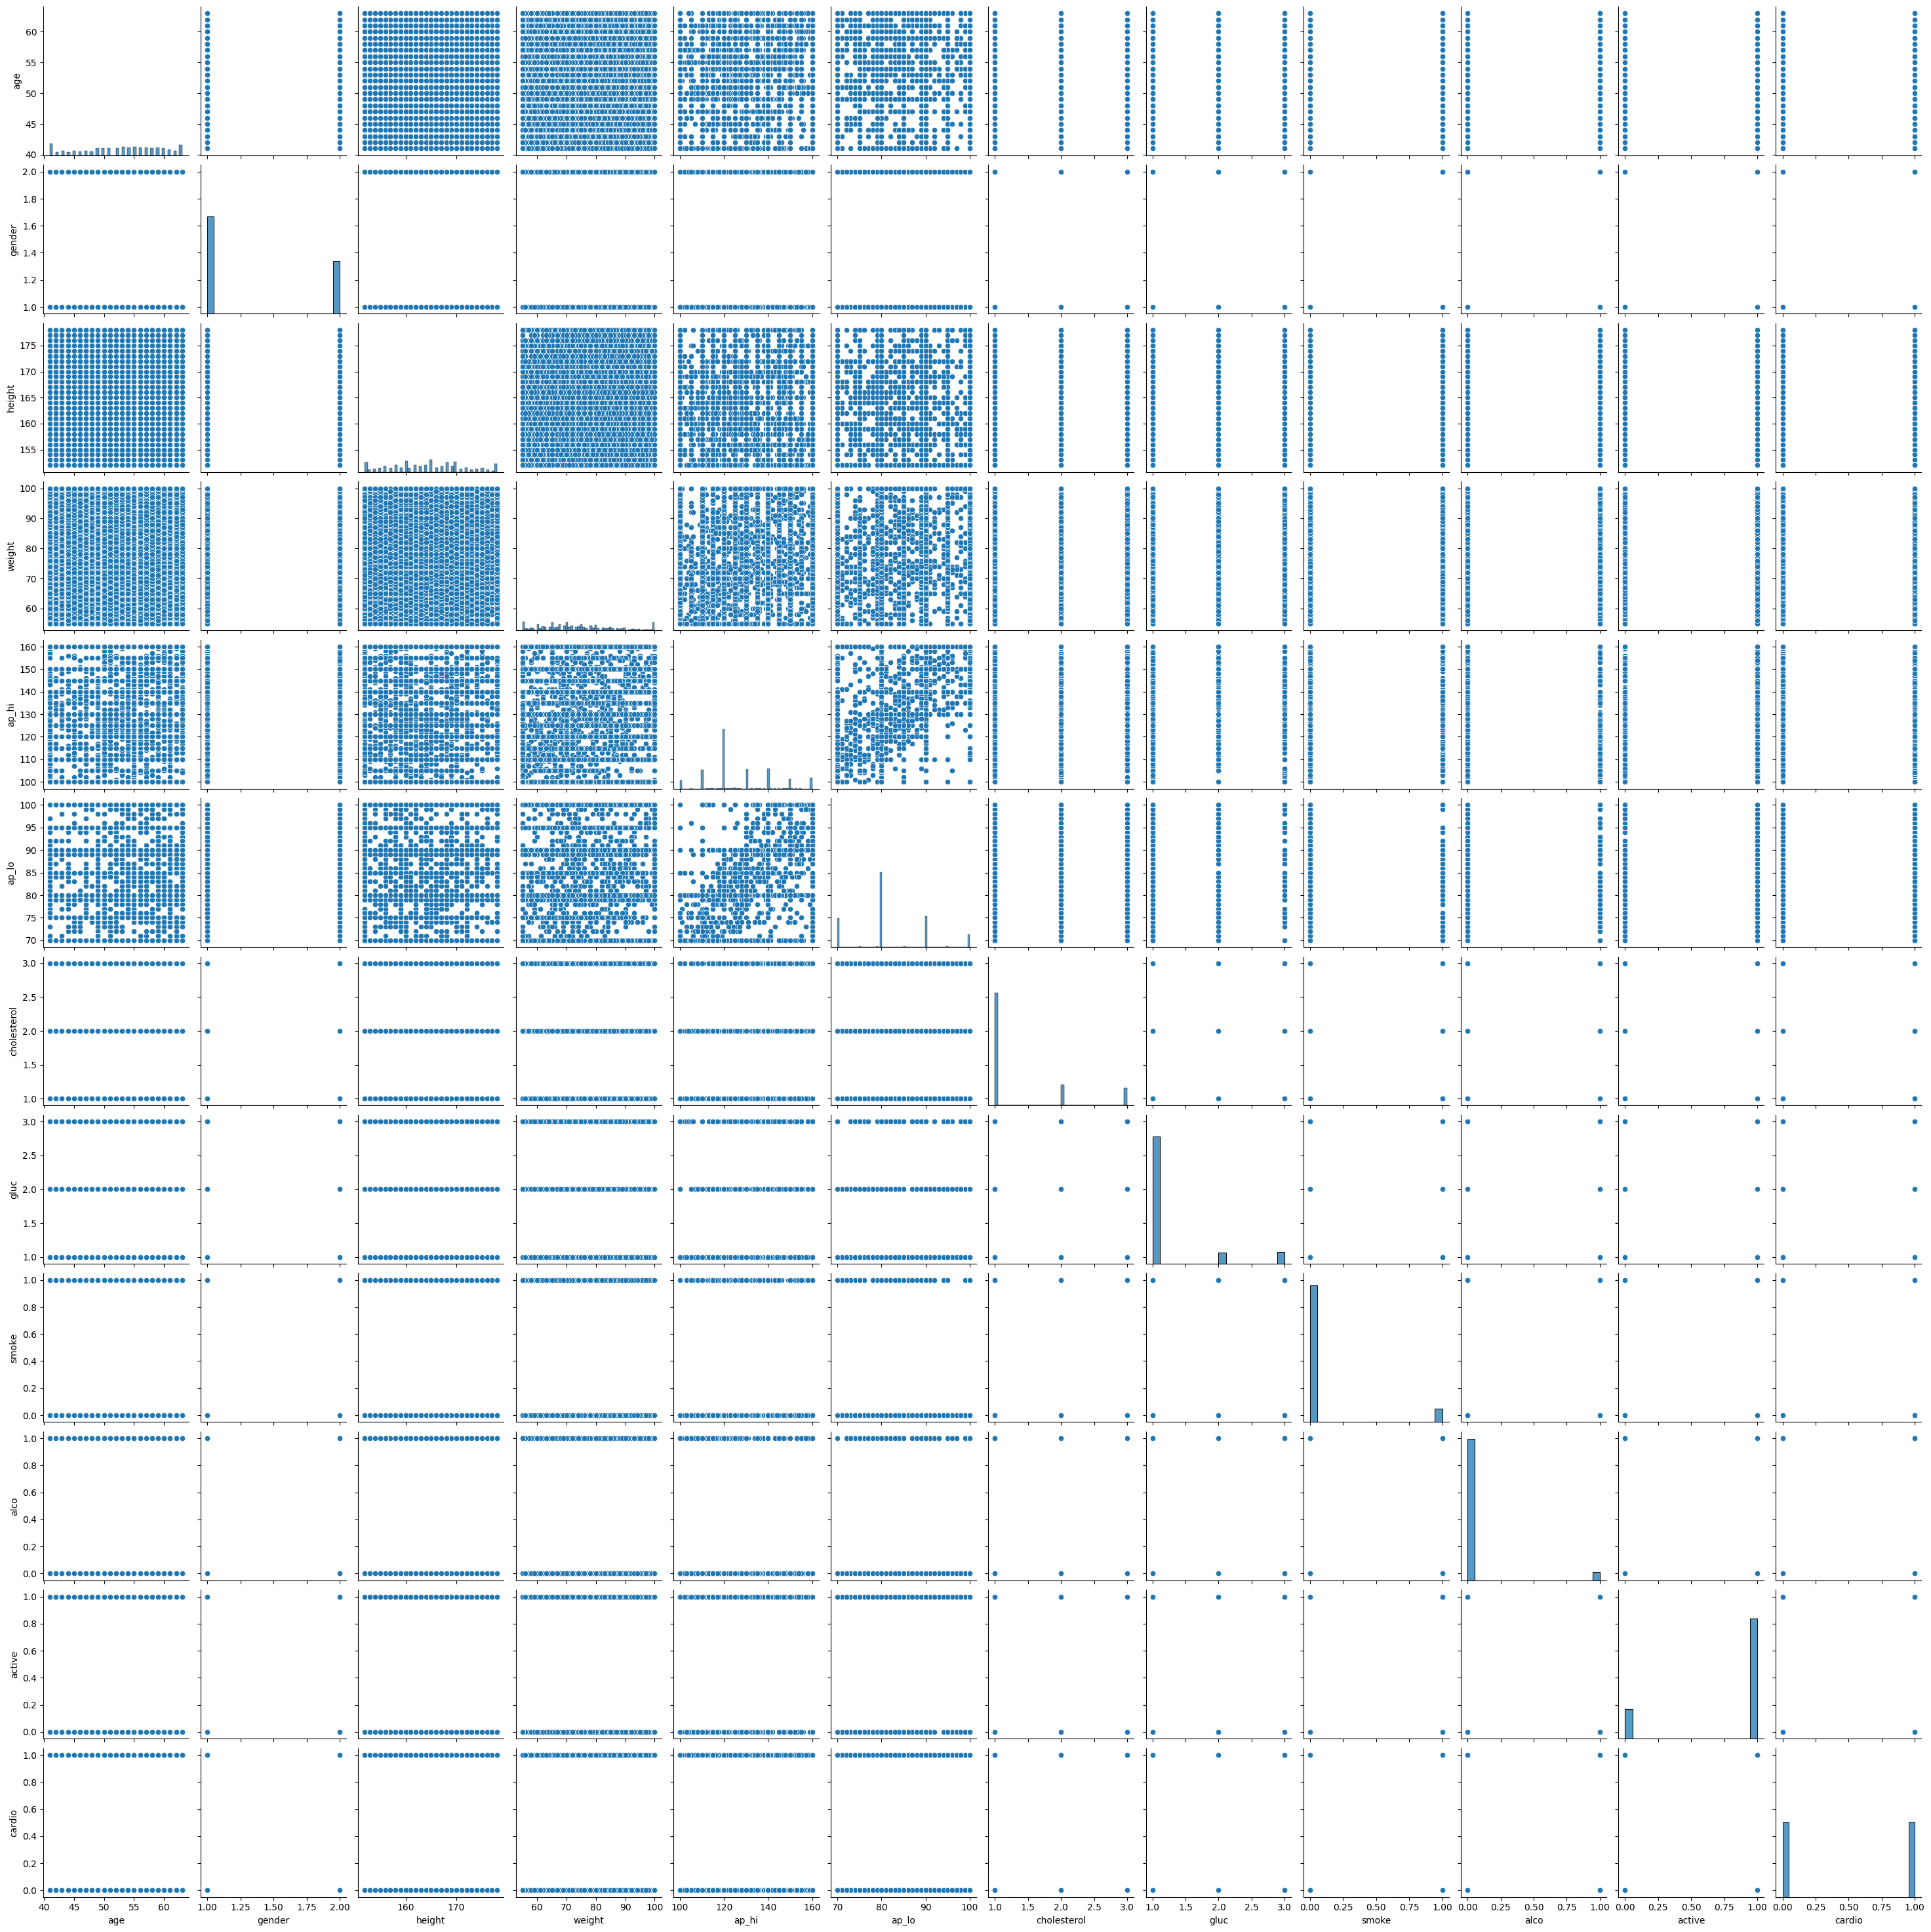

In [ ]:
sns.pairplot(df_capped)
plt.show()

###**Pie chart**

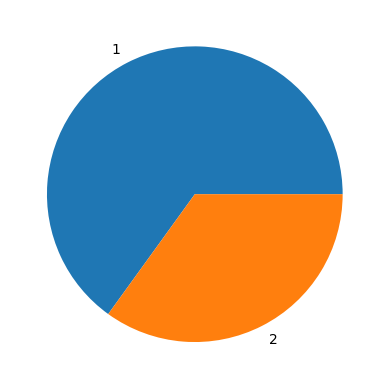

In [ ]:
plt.pie(df_capped['gender'].value_counts().values, labels=df_capped['gender'].value_counts().index)
plt.show()

###**Count plot**

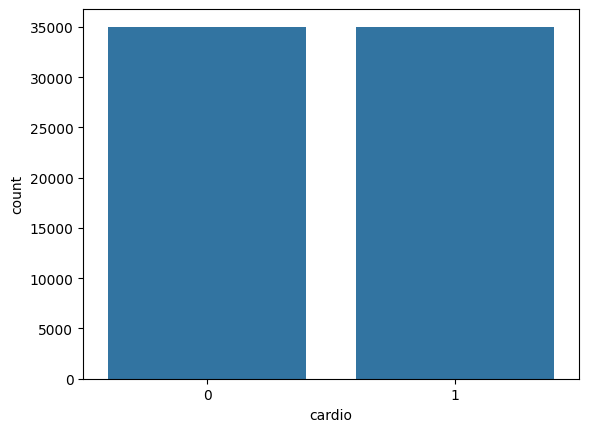

In [ ]:
sns.countplot(x=df_capped['cardio'])
plt.show()

##**7. Feature Engineering**

In [18]:
Cat_cols = df_capped.select_dtypes(include=['object']).columns
Num_cols = df_capped.select_dtypes(include=['int64','float64']).columns

print("\n Number of Categorical Columns are : ", len(Cat_cols))
print("\n Number of Numerical Columns are : ", len(Num_cols))




 Number of Categorical Columns are :  0

 Number of Numerical Columns are :  12


#### **Since all columns in this dataset are numerical, no encoding is required.**

##**8. Feauture Selection**

Here I apply **SelectKBest** method for feature selection.

**SelectKBest** is a feature selection method in Scikit-learn that selects the top k features based on a chosen statistical test. It helps reduce dimensionality by keeping only the most relevant features.



In [19]:
X = df_capped.drop(columns=['cardio'])  # 'cardio' is the target
y = df_capped['cardio']

# Apply SelectKBest to get top 8 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)

# Get mask of selected features
mask = selector.get_support()

# Get selected feature names
selected_features = X.columns[mask].tolist()

print("Top 8 selected features:")
print(selected_features)

Top 8 selected features:
['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'active']


In [20]:
#display selected features for model building
df_capped[selected_features]

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,50,62.0,110,80,1,1,0,1
1,55,85.0,140,90,3,1,0,1
2,51,64.0,130,70,3,1,0,0
3,48,82.0,150,100,1,1,0,1
4,47,56.0,100,70,1,1,0,0
...,...,...,...,...,...,...,...,...
69995,52,76.0,120,80,1,1,1,1
69996,61,100.0,140,90,2,2,0,1
69997,52,100.0,160,90,3,1,0,0
69998,61,72.0,135,80,1,2,0,0


##**9. Feature Scaling**

In [21]:
scaler = StandardScaler()

# Fit the scaler on the selected features and transform them
X_standardized = scaler.fit_transform(X_selected)
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_standardized

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,-0.438711,-0.956232,-1.082820,-0.222778,-0.539322,-0.395720,-0.310879,0.494167
1,0.321849,0.894458,0.870232,0.965871,2.400793,-0.395720,-0.310879,0.494167
2,-0.286599,-0.795303,0.219214,-1.411428,2.400793,-0.395720,-0.310879,-2.023607
3,-0.742934,0.653064,1.521249,2.154520,-0.539322,-0.395720,-0.310879,0.494167
4,-0.895046,-1.439021,-1.733838,-1.411428,-0.539322,-0.395720,-0.310879,-2.023607
...,...,...,...,...,...,...,...,...
69995,-0.134487,0.170275,-0.431803,-0.222778,-0.539322,-0.395720,3.216684,0.494167
69996,1.234521,2.101430,0.870232,0.965871,0.930735,1.351719,-0.310879,0.494167
69997,-0.134487,2.101430,2.172266,0.965871,2.400793,-0.395720,-0.310879,-2.023607
69998,1.234521,-0.151584,0.544723,-0.222778,-0.539322,1.351719,-0.310879,-2.023607


##**10. Split Data into Training and Testing Sets**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42,)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)


X_train :  (56000, 8)
X_test :  (14000, 8)
y_train :  (56000,)
y_test :  (14000,)


###**Checking Class imbalance of the target variable**

In [23]:
df_capped['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


In [24]:
#Calculate Class Imbalance Ratio
maj_cls = df_capped['cardio'].value_counts().max()
min_cls = df_capped['cardio'].value_counts().min()
ratio = maj_cls/min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.00


###**CIR Range**

**1.0 - 1.5 (Slight Imbalance)**

* No major adjustments needed
* Stratified Sampling in train-test split

**1.5 - 3.0 (Moderate Imbalance)**

* SMOTE (Synthetic Minority Over-sampling Technique)

**3.0 - 10.0 (High Imbalance)**

* SMOTE or ADASYN

**>10.0 (Extreme Imbalance)**

* Hybrid Approach: Over-sampling + Under-sampling
* Anomaly Detection Methods (One-Class SVM, Isolation Forest)

Based on the CIR range, our dataset exhibits acceptable balance,and no further adjustments are required.

##**11. Build the ML Model**

###**Models**

* **Logistic regression** is a classification algorithm that predicts the probabilities using a sigmoid function,making it ideal for binary classification tasks.

* **Support Vector Machine** (SVM) is a powerful supervised learning algorithm
  used primarily for classification tasks. It works by finding the optimal hyperplane that best separates data points of different classes with the maximum margin. The closest data points to this boundary are called support vectors, and they are critical in defining the decision boundary.

* **Random Forest** is a popular ensemble machine learning algorithm used for
  both classification and regression problems. It works by building multiple decision trees and combining their predictions to produce a more accurate and stable result.

* **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks. It models decisions as a tree-like structure where each node represents a feature, each branch represents a decision rule, and each leaf represents an outcome or prediction.

* **K-Nearest Neighbors** (KNN) is a simple, non-parametric supervised learning algorithm used for classification and regression. It makes predictions based on the ‘K’ closest data points (neighbors) in the training set.

* **Gradient Boosting** is a powerful ensemble machine learning technique used for classification and regression. It builds a strong model by combining many weak learners (typically decision trees) in a sequential manner.

* **AdaBoost** (Adaptive Boosting) is a boosting ensemble technique used in machine learning to improve the performance of weak learners, typically decision trees.













In [25]:
#importing required libraries for the model implementation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

##**12. Model Evaluation -Classification Matrics**


Logistic Regression Performance:
Accuracy: 0.7312
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.76      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



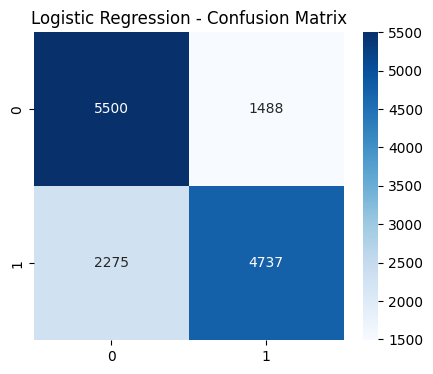


Support Vector Machine Performance:
Accuracy: 0.7376
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6988
           1       0.77      0.68      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



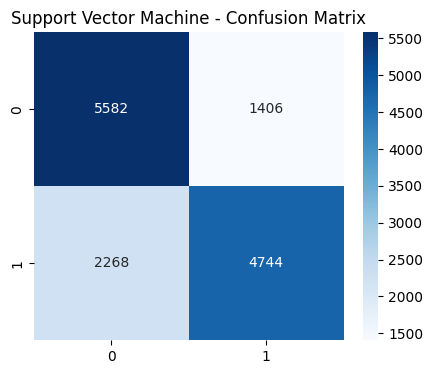


Random Forest Performance:
Accuracy: 0.6998
              precision    recall  f1-score   support

           0       0.69      0.72      0.71      6988
           1       0.71      0.68      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



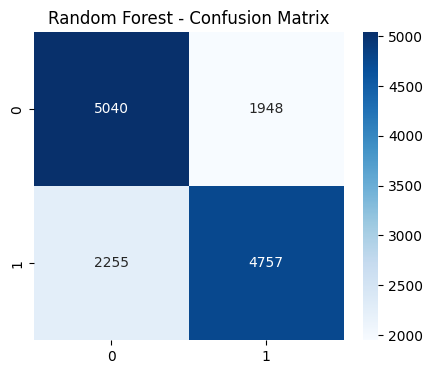


Decision Tree Performance:
Accuracy: 0.6657
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      6988
           1       0.69      0.59      0.64      7012

    accuracy                           0.67     14000
   macro avg       0.67      0.67      0.66     14000
weighted avg       0.67      0.67      0.66     14000



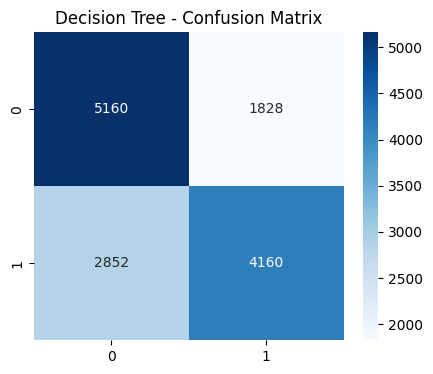


K-Nearest Neighbors Performance:
Accuracy: 0.7056
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6988
           1       0.71      0.70      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



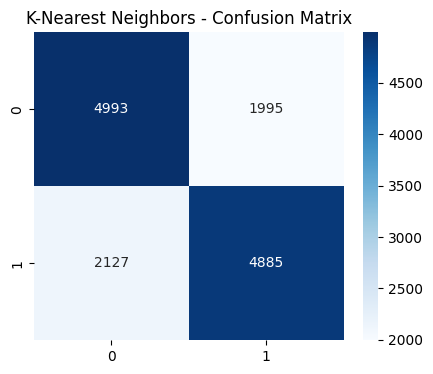


Gradient Boosting Performance:
Accuracy: 0.7382
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



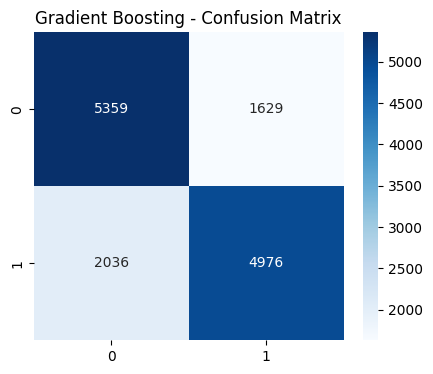


AdaBoost Classifier Performance:
Accuracy: 0.7325
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6988
           1       0.78      0.65      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



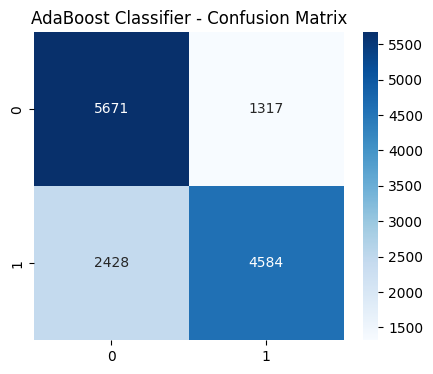

In [ ]:
# Train and Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    tr_acc = model.score(X_train, y_train)
    results.append({"Model": name, "Accuracy": acc, "Train Accuracy": tr_acc})

    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    #plt.xlabel("Predicted")
    #plt.ylabel("Actual")
    plt.show()

Among the models, **Gradient Boosting** achieved the highest accuracy of **73.82%**, along with strong precision, recall, and F1-score, making it the most effective overall. Close behind, the **Support Vector Machine** (SVM) also performed well with an accuracy of **73.76%*. **AdaBoost** and **Logistic Regression** followed with respectable accuracies above **73%**, showing that both ensemble and linear models can perform okay on this dataset. In contrast, **Random Forest**, **K-Nearest Neighbors** (KNN), and **Decision Tree** lagged in performance, with **Decision Tree** being the weakest, indicating possible overfitting or lack of generalization. Overall, ensemble method, **Gradient Boosting** , demonstrated superior predictive power and generalization, suggesting it is the most suitable choices for this classification task.

###**ROC (Receiver Operating Characteristic) Curve**

The ROC (Receiver Operating Characteristic) Curve is a graphical tool used to evaluate the performance of a binary classification model. It plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds.

* It helps visualize the trade-off between sensitivity and specificity.

* A model with a curve closer to the top-left corner indicates better
  performance.

* The AUC (Area Under the Curve) value summarizes the ROC curve into a single
  score — higher AUC means better model discrimination.

###**Components of ROC Curve**

* True Positive Rate (TPR) (Sensitivity) on the Y-axis

* False Positive Rate (FPR) (1 - Specificity) on the X-axis

A model with a perfect classification has an ROC curve that passes through the top left corner (TPR = 1, FPR = 0).
* AUC (Area Under the Curve)
  AUC measures the area under the ROC curve. Its value ranges between 0 and
  1.AUC = 1: Perfect model

  2.AUC = 0.5: Random guessing (no discrimination power)

  3.AUC < 0.5: Worse than random guessing

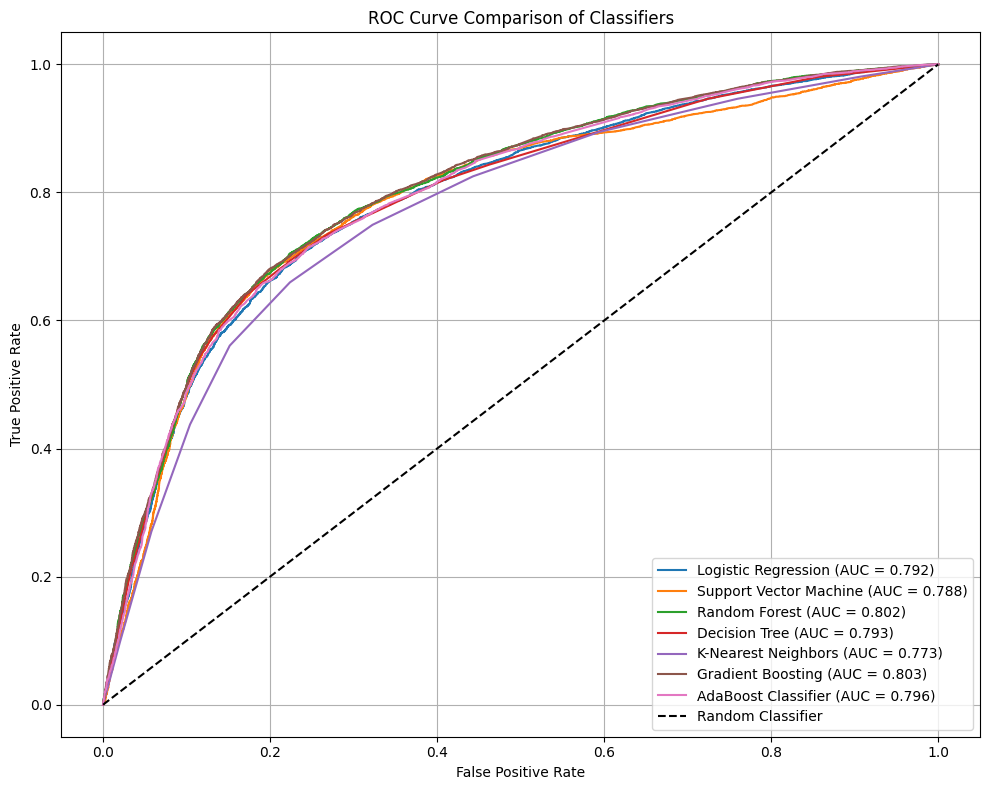

In [ ]:
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Use predict_proba or decision_function depending on the model
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve Comparison of Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

###**Calculating Training and Testing Accuracy of models**

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                    Model  Accuracy  Train Accuracy
5       Gradient Boosting  0.738214        0.736411
1  Support Vector Machine  0.737571        0.735429
6     AdaBoost Classifier  0.732500        0.726393
0     Logistic Regression  0.731214        0.727571
4     K-Nearest Neighbors  0.705571        0.771036
2           Random Forest  0.699786        0.876482
3           Decision Tree  0.665714        0.876482


In [ ]:
results_df

,Model,Accuracy,Train Accuracy
5,Gradient Boosting,0.738214,0.736411
1,Support Vector Machine,0.737571,0.735429
6,AdaBoost Classifier,0.732500,0.726393
0,Logistic Regression,0.731214,0.727571
4,K-Nearest Neighbors,0.705571,0.771036
2,Random Forest,0.699786,0.876482
3,Decision Tree,0.665714,0.876482


* **Gradient Boosting** emerged as the top-performing model with a test accuracy of 0.7382, showing strong predictive capability and good generalization to new data.

* **Support Vector Machine** (SVM) model follows closely behind with 0.7375
  test accuracy, making it a solid alternative, although it slightly underperforms compared to Gradient Boosting.

* **Logistic Regression** and **AdaBoost** show moderate performance, with test
  accuracies around 0.72–0.73, indicating they are reasonably effective but not the most optimal.

* **Random Forest** and **Decision Tree** models have very high training
  accuracies (both around 0.877), but much lower test accuracies, indicating that they are overfitting the training data and do not generalize well.

* **K-Nearest Neighbors** (KNN) also exhibits signs of overfitting, with a high
  training accuracy (0.7710) but a lower test accuracy (0.705).



##**Regularization**

**Regularization** is a technique in machine learning used to prevent overfitting by adding a penalty to the loss function. This ensures that the model generalizes well to unseen data.

common types of regularization: L1 (Lasso) and L2 (Ridge).

Here we applying regularization techniques to all models to prevent overfitting.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500),
    "Support Vector Machine": SVC(kernel='linear', C=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=10),
    "Decision Tree": DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_split=10),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05)
}

# Apply regularization and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Printing the results
    print(f"{model_name}:")
    print(f"Train_Accuracy: {train_accuracy}")
    print(f"Test_Accuracy: {test_accuracy}")
    print()

Logistic Regression:
Train_Accuracy: 0.7275714285714285
Test_Accuracy: 0.7312142857142857

Support Vector Machine:
Train_Accuracy: 0.725375
Test_Accuracy: 0.7304285714285714

Random Forest:
Train_Accuracy: 0.7490357142857142
Test_Accuracy: 0.7387857142857143

Decision Tree:
Train_Accuracy: 0.7277857142857143
Test_Accuracy: 0.7323571428571428

K-Nearest Neighbors:
Train_Accuracy: 0.7540535714285714
Test_Accuracy: 0.7177857142857142

Gradient Boosting:
Train_Accuracy: 0.7360357142857142
Test_Accuracy: 0.7372857142857143



After applying regularization on models,
* **Gradient Boosting** achieved the highest test accuracy (73.72%) with a well-balanced train accuracy (73.60%), indicating strong generalization and effective regularization.

* **Random Forest** also performed well on the test data (73.87%) but showed a slightly higher training accuracy, suggesting mild overfitting.

* **Support Vector Machine** and **Logistic Regression** had closely matched train and test accuracies approximately(73%), indicating good generalization and that regularization helped prevent overfitting.

* **K-Nearest Neighbors** had the highest training accuracy (75.40%) but a lower test accuracy (71.77%), showing some overfitting.

* **Decision Tree** showed balanced accuracies but slightly lower overall performance compared to ensemble methods.

* **Gradient Boosting** remains the best-performing model after regularization due to its strong generalization and consistent performance.










##**13. Hyperparameter Tuning and Pipeline**

Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to maximize its performance.

* Improve Model Performance
* Reduce Overfitting or Underfitting
* Enhance Generalization to Unseen Data
* GridSearchCV, RandomizedSearchCV, and Bayesian Optimization are some methods
  for hyperparameter tuning.



From the above evaluations, we conclude that **GradientBoosting** is the best model. So now lets try to increase its performance through Hyperparameter tuning




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
gb_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
gb = GradientBoostingClassifier(random_state=42)

# Instantiate the GridSearchCV
gb_grid = GridSearchCV(estimator=gb,
                       param_grid=gb_params,
                       cv=5,
                       n_jobs=-1,
                       scoring='accuracy',
                       verbose=1)

# Fit to training data
gb_grid.fit(X_train, y_train)

# Get the best model, best parameters, and accuracy
best_gb = gb_grid.best_estimator_
best_gb_params = gb_grid.best_params_
gb_accuracy = accuracy_score(y_test, best_gb.predict(X_test))

# Print results
print(f"Best GradientBoosting Model: {best_gb}")
print(f"Best Parameters: {best_gb_params}")
print(f"Accuracy: {gb_accuracy:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best GradientBoosting Model: GradientBoostingClassifier(random_state=42)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7382


After applying Hyperparameter tuning using **gridsearchCV** with 5‑fold cross‑validation over 243 hyperparameter combinations (1,215 total fits), the optimal Gradient Boosting model used 100 estimators, a learning rate of 0.1, and shallow trees (maximum depth of 3, with minimum samples per split = 2 and per leaf = 1).

**Gradient Boosting** model's accuracy improved to 73.82% after hyperparameter tuning.

Before tuning: Accuracy was 73.72%

After tuning: Accuracy is 73.82%

Tuning slightly improved the performance.

##**14. Save the Model**

In [ ]:
import joblib # Importing library

# Saveing the trained model
joblib.dump(best_gb, "gradient_boosting_model.joblib")
print("Model saved successfully!")

Model saved successfully!


##**Pipeline**

A machine learning **pipeline** was implemented to automate data preprocessing, feature selection, and model training, ensuring efficiency and reproducibility.

In [28]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
# parameters get from hyperparametertuning
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
)
selected_features = ['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'active']

preprocessor = ColumnTransformer([
    ('keep', 'passthrough', selected_features)],
                                 remainder='drop')

#define pipeline
Pipeline = Pipeline(steps=[
     ('preprocessor', preprocessor),
     ('scaler', StandardScaler()),
     ('classifier',gb_model)
])

# Train the pipeline
Pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['age', 'weight', 'ap_hi',
                                                   'ap_lo', 'cholesterol',
                                                   'gluc', 'smoke',
                                                   'active'])])),
                ('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier(max_depth=4))])

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



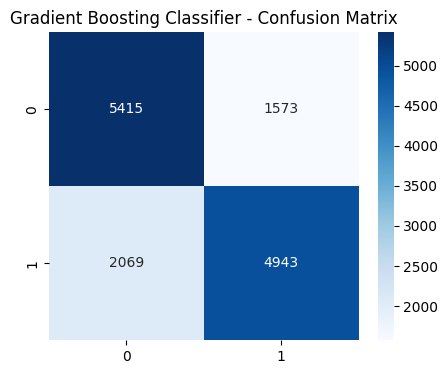

In [29]:
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.show()

###**Save Pipeline**

In [31]:
import joblib

In [32]:
# Saving the Pipeline
model_file ='/content/gradient_boosting_model.joblib'
joblib.dump(Pipeline, model_file)
print("Pipeline saved successfully!")


Pipeline saved successfully!


##**15. Test with Unseen Data**

In [33]:
# Load the  file
loaded_pipe = joblib.load('/content/gradient_boosting_model.joblib')

# Load the unseen test data
df_test = pd.read_csv('/content/unseen_data_csv.csv')

# Make prediction on the loaded unseen test data
predictions = loaded_pipe.predict(df_test)

# Print the predictions
print(predictions)

[1 1 1 1 1 1 1]


In [34]:
#display unseen data
df_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,32,1,170,65,125,85,1,1,0,0,1
1,45,2,175,75,140,90,2,2,1,1,0
2,28,1,168,70,120,80,1,1,0,0,1
3,38,2,172,60,130,85,3,3,0,0,1
4,50,1,180,80,150,95,1,1,1,1,0
5,60,2,165,55,110,75,2,2,0,0,1
6,42,1,178,85,160,100,1,1,1,1,0


This unseendata consists of 10 rows and 11 columns identical to the original data except target variable. The prediction results from the unseen data, where all seven individuals were classified as having cardiovascular disease (class 1), suggest that the model is likely biased toward predicting the positive class. It may indicate that the features of the unseen data are strongly associated with the positive class.This outcome indicates that the model has identified key features—such as blood pressure, cholesterol levels, glucose levels, and lifestyle factors like smoking or physical activity—that are strongly aligned with cardiovascular risk based on the patterns it learned during training. The uniformity of the predictions highlights the model’s sensitivity to these risk factors and reflects its ability to flag individuals who may benefit from further medical evaluation or preventive care.



##**16. Conclusion**

This project focused on predicting the risk of cardiovascular disease (CVD) based on various health parameters using various machine learning models. In this project, we explored multiple machine learning models to predict the presence of (CVD), with GradientBoosting emerging as the best-performing model after hyperparameter tuning.  It achieved good accuracy not high and balanced performance across metrics such as precision,recall and F1Score.

Key Findings:

* Data preprocessing, including capping for handling outliers, feature selection, and scaling, significantly improved model performance.

* Pipeline created for unseen data

The trained model was applied to an unseen dataset with the same structure but without the target variable. The model made consistent predictions, identifying individuals at risk of cardiovascular disease based on their health profiles. This project illustrates how machine learning can assist in early detection of cardiovascular disease, supporting preventive care. With high-quality data and continued refinement, such models can serve as effective tools in clinical decision-making and public health monitoring.





















##**17.Future Work**

* **Explore Advanced Modeling Techniques**

 While Gradient Boosting Classifier showed good results, exploring deep learning algorithms such as neural networks or other ensemble methods (like XGBoost, LightGBM) could potentially offer higher accuracy and capture more complex patterns in the data.

* **Continuous Model Retraining**

 Periodically update and retrain the model with new patient data to adapt to evolving population health trends and maintain robustness over time.

* **Feature Expansion & Engineering**

 Incorporate additional clinical and lifestyle variables—such as family history, dietary habits, stress levels, or longitudinal measurements—and derive new features (e.g., blood pressure variability) to enrich the model’s predictive power.

